In [111]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [112]:
tv_usage_info = pd.read_csv("data/PEO TV usage Information.csv")
tv_usage_info

,Phone Number,Phone Number.hash,Peo TV Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,
0,912287049,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,R-GL,IM-NODE,UA5000(IPMB),39153,1,
1,912287049,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,R-GL,IM-NODE,UA5000(IPMB),39153,1,
2,912286967,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,R-GL,IM-NODE,UA5000(IPMB),39153,1,
3,912286967,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,R-GL,IM-NODE,UA5000(IPMB),39153,1,
4,912286838,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87:20:55,70:51:48,101:49:22,72:31:40,120:04:35,115:43:49,67:52:13,93:45:58,R-GL,IM-NODE,UA5000(IPMB),39153,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,112054356,5fc30724801d125e0048b486655723f6,PEO_SILVER,94:30:06,103:19:48,68:31:40,77:38:02,106:20:08,91:02:10,78:00:14,67:34:16,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2589,112053643,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2590,112053643,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2591,112053582,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0,0,0,0,0,0,41:19:59,83:00:07,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,


In [113]:
# Handle null values
# Drop unnecessary cols
# Pivot by monthYear
# Usage rating usage time- bucketizing/ add rating cols
# location grouping/bucketizing (consider 4 location cols)
# No of users by PEO TV Package
# Most used PEO TV Package Ranking
# User profile dim table
# visualize and analyze data

In [114]:
tv_usage_info = tv_usage_info.drop(['Phone Number'], axis=1)
tv_usage_info.rename(columns={'Phone Number.hash': 'Phone_Number.hash','Peo TV Package':'Peo_TV_Package'}, inplace=True)
# tv_usage_info = tv_usage_info.drop_duplicates(['Phone_Number.hash',"Peo_TV_Package"], keep='last')
tv_usage_info

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,R-GL,IM-NODE,UA5000(IPMB),39153,1,
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,R-GL,IM-NODE,UA5000(IPMB),39153,1,
2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,R-GL,IM-NODE,UA5000(IPMB),39153,1,
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,R-GL,IM-NODE,UA5000(IPMB),39153,1,
4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87:20:55,70:51:48,101:49:22,72:31:40,120:04:35,115:43:49,67:52:13,93:45:58,R-GL,IM-NODE,UA5000(IPMB),39153,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,94:30:06,103:19:48,68:31:40,77:38:02,106:20:08,91:02:10,78:00:14,67:34:16,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0,0,0,0,0,0,41:19:59,83:00:07,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,


In [115]:
tv_usage_info.isnull().sum(axis=0)

Phone_Number.hash      0
Peo_TV_Package         0
usage_08_20 (hh:mm)    0
usage_07_20 (hh:mm)    0
usage_06_20 (hh:mm)    0
usage_05_20 (hh:mm)    0
usage04_20 (hh:mm)     0
usage_03_20 (hh:mm)    0
usage_02_20 (hh:mm)    0
usage_01_20 (hh:mm)    0
RTOM_CODE              0
LOCATION_CODE          0
MSAN                   0
EQUP_ID                0
EQUP_INDEX             0
                       0
dtype: int64

# Phase 1

## Usage Ranking

- 1. Pivot by year-month
- 2. Bin by Upload/Download/Duration
- 3. Usage Rank
- 4. Labling usage

In [116]:
tv_usage = tv_usage_info.drop(['RTOM_CODE','LOCATION_CODE','MSAN','EQUP_ID','EQUP_INDEX'], axis=1)
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,
2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,
4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87:20:55,70:51:48,101:49:22,72:31:40,120:04:35,115:43:49,67:52:13,93:45:58,
...,...,...,...,...,...,...,...,...,...,...,...
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,94:30:06,103:19:48,68:31:40,77:38:02,106:20:08,91:02:10,78:00:14,67:34:16,
2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,
2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0,0,0,0,0,0,41:19:59,83:00:07,


In [117]:
usage_cols = ['usage_08_20 (hh:mm)','usage_07_20 (hh:mm)','usage_06_20 (hh:mm)','usage_05_20 (hh:mm)','usage04_20 (hh:mm)','usage_03_20 (hh:mm)','usage_02_20 (hh:mm)','usage_01_20 (hh:mm)']

### Transforminbg duration values to float values in Hours

In [118]:
def get_duration(val):
    time= 0
    if val != "0":
        val_list = val.split(":")
        time = int(val_list[0]) + int(val_list[1])/60
    return time

In [119]:
#test case 1
get_duration("145:09:52")

145.15

In [120]:
# test case 2
get_duration("0")

0

In [121]:
# fixing usage durations
for col in usage_cols:
    tv_usage[col] = tv_usage[col].apply(lambda x: get_duration(x))
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145.150000,159.250000,183.650000,212.116667,311.700000,251.400000,132.233333,225.800000,
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145.150000,159.250000,183.650000,212.116667,311.700000,251.400000,132.233333,225.800000,
2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15.216667,11.516667,17.433333,32.166667,79.183333,92.666667,16.966667,21.266667,
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15.216667,11.516667,17.433333,32.166667,79.183333,92.666667,16.966667,21.266667,
4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87.333333,70.850000,101.816667,72.516667,120.066667,115.716667,67.866667,93.750000,
...,...,...,...,...,...,...,...,...,...,...,...
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,94.500000,103.316667,68.516667,77.633333,106.333333,91.033333,78.000000,67.566667,
2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72.816667,92.083333,86.350000,104.100000,151.900000,113.950000,74.233333,92.300000,
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72.816667,92.083333,86.350000,104.100000,151.900000,113.950000,74.233333,92.300000,
2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.316667,83.000000,


In [122]:
# test
tv_usage[(tv_usage["Phone_Number.hash"]=="ffee845c0caa320b55e31bb156827d16")]

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),
2516,ffee845c0caa320b55e31bb156827d16,PEO_SILVER,101.816667,127.483333,109.083333,89.35,113.966667,82.666667,61.95,111.533333,
2517,ffee845c0caa320b55e31bb156827d16,PEO_SILVER,101.816667,127.483333,109.083333,89.35,113.966667,82.666667,61.95,111.533333,


### Grouping usage

In [123]:
tv_usage = tv_usage.groupby(['Phone_Number.hash','Peo_TV_Package'], as_index=False, sort=False).sum()
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm)
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,290.300000,318.500000,367.300000,424.233333,623.400000,502.800000,264.466667,451.600000
1,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,30.433333,23.033333,34.866667,64.333333,158.366667,185.333333,33.933333,42.533333
2,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,174.666667,141.700000,203.633333,145.033333,240.133333,231.433333,135.733333,187.500000
3,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,273.000000,270.833333,350.200000,226.866667,345.466667,395.266667,477.400000,422.166667
...,...,...,...,...,...,...,...,...,...,...
1423,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,385.700000,488.400000,405.133333,331.866667,416.433333,442.066667,397.100000,429.966667
1424,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1425,5fc30724801d125e0048b486655723f6,PEO_SILVER,94.500000,103.316667,68.516667,77.633333,106.333333,91.033333,78.000000,67.566667
1426,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,145.633333,184.166667,172.700000,208.200000,303.800000,227.900000,148.466667,184.600000


In [124]:
# test
tv_usage[(grouped_tv_usage["Phone_Number.hash"]=="ffee845c0caa320b55e31bb156827d16")]

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm)
1382,ffee845c0caa320b55e31bb156827d16,PEO_SILVER,203.633333,254.966667,218.166667,178.7,227.933333,165.333333,123.9,223.066667


### Usage ratings for year-month

In [125]:
tv_usage.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm)
count,1428.00000,1428.00000,1428.00000,1428.00000,1428.00000,1428.00000,1428.00000,1428.00000
mean,180.58707,200.99196,186.56092,139.74849,203.25076,203.46332,179.53725,195.79497
std,251.49545,280.19027,252.98763,185.05630,265.26691,266.60371,250.10896,262.44214
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,99.16667,105.21667,100.17500,83.21667,129.51667,136.35833,100.18333,112.75000
75%,258.14167,295.70000,273.92500,212.43333,306.92500,304.45833,253.71667,293.88333
max,2690.50000,2691.50000,2214.50000,1884.66667,2545.33333,2299.83333,2395.16667,2349.16667


In [126]:
# binning call_count
usage_bins = [0,30,100,260,2690]
for col in usage_cols:
    tv_usage[col] = np.searchsorted(usage_bins, tv_usage[col].values)
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm)
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,4,4,4,4,4,4,4,4
1,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,2,1,2,2,3,3,2,2
2,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,3,3,3,3,3,3,3,3
3,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0,0,0,0,0,0,0,0
4,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,4,4,4,3,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...
1423,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,4,4,4,4,4,4,4,4
1424,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0,0,0,0,0,0,0,0
1425,5fc30724801d125e0048b486655723f6,PEO_SILVER,2,3,2,2,3,2,2,2
1426,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,3,3,3,3,4,3,3,3


### Min Max Scalaer

In [127]:
# scaling usage rating
scaler = MinMaxScaler()
for col in usage_cols:
    tv_usage[col] = scaler.fit_transform(tv_usage[col].values.reshape(-1,1))

<AxesSubplot:>

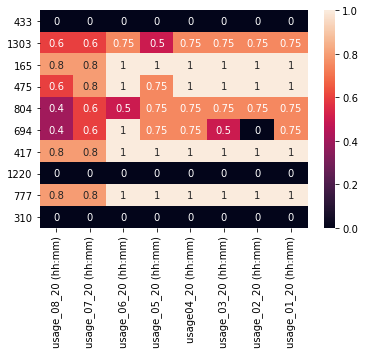

In [128]:
sns.heatmap(tv_usage[usage_cols].sample(n=10), annot=True)

<AxesSubplot:>

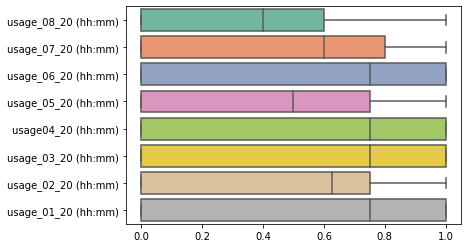

In [129]:
ax = sns.boxplot(data=tv_usage[[x for x in usage_cols]], orient="h", palette="Set2")
ax

<AxesSubplot:ylabel='Density'>

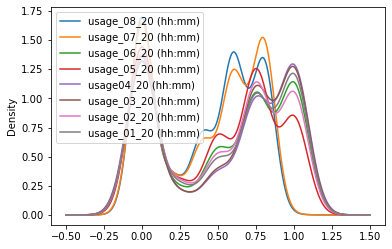

In [130]:
tv_usage[[x for x in usage_cols]].plot(kind = 'density')

In [131]:
tv_usage['Usage_Rating_Scaled'] = tv_usage[usage_cols].sum(axis=1)/len(usage_cols)
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),Usage_Rating_Scaled
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.8,0.8,1.00,1.00,1.00,1.00,1.00,1.00,0.95000
1,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.4,0.2,0.50,0.50,0.75,0.75,0.50,0.50,0.51250
2,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,0.6,0.6,0.75,0.75,0.75,0.75,0.75,0.75,0.71250
3,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00000
4,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,0.8,0.8,1.00,0.75,1.00,1.00,1.00,1.00,0.91875
...,...,...,...,...,...,...,...,...,...,...,...
1423,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,0.8,0.8,1.00,1.00,1.00,1.00,1.00,1.00,0.95000
1424,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00000
1425,5fc30724801d125e0048b486655723f6,PEO_SILVER,0.4,0.6,0.50,0.50,0.75,0.50,0.50,0.50,0.53125
1426,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.6,0.6,0.75,0.75,1.00,0.75,0.75,0.75,0.74375


In [132]:
# labling usage bins
bins = [0, 0.33, 0.66,1]
labels = ['LOW','MEDIUM','HIGH']
tv_usage['Usage_Rating_Categorical'] = pd.cut(tv_usage['Usage_Rating_Scaled'], bins=bins, labels=labels)
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),Usage_Rating_Scaled,Usage_Rating_Categorical
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.8,0.8,1.00,1.00,1.00,1.00,1.00,1.00,0.95000,HIGH
1,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.4,0.2,0.50,0.50,0.75,0.75,0.50,0.50,0.51250,MEDIUM
2,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,0.6,0.6,0.75,0.75,0.75,0.75,0.75,0.75,0.71250,HIGH
3,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00000,NaN
4,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,0.8,0.8,1.00,0.75,1.00,1.00,1.00,1.00,0.91875,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...
1423,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,0.8,0.8,1.00,1.00,1.00,1.00,1.00,1.00,0.95000,HIGH
1424,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00000,NaN
1425,5fc30724801d125e0048b486655723f6,PEO_SILVER,0.4,0.6,0.50,0.50,0.75,0.50,0.50,0.50,0.53125,MEDIUM
1426,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.6,0.6,0.75,0.75,1.00,0.75,0.75,0.75,0.74375,HIGH


In [133]:
# adding category "NO" 
tv_usage['Usage_Rating_Categorical'] = tv_usage['Usage_Rating_Categorical'].cat.add_categories("NO")
tv_usage.loc[tv_usage['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"
tv_usage[(tv_usage['Usage_Rating_Scaled'] == 0.0)]

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),Usage_Rating_Scaled,Usage_Rating_Categorical
3,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO
9,82dec366d337db00245e0e6963195fb6,PEO_UTHAYAM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO
10,e513ea561737d58fe19c475b14959929,DOUBLEPROMO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO
14,502177e7eaecfb7f42f6ba57e45a303f,PEO_SILVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO
18,9f0a02155f92685e7b5d51dc51655d91,PEO_SILVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
1414,3097b0c0d4a8cd24fbcd197491c998de,PEO_SILVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO
1415,62ff1f7426058b9c721aee1b897cd378,PEO_SILVER_PLUS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO
1417,ba2cd0a629f9bd5acc9d7fcd89971dad,PEO_SILVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO
1422,043588932b222223b85a714e32f6c1f2,PEO_SILVER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO


### Fina Result: Usage Ratings

In [134]:
tv_usage

,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),Usage_Rating_Scaled,Usage_Rating_Categorical
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.8,0.8,1.00,1.00,1.00,1.00,1.00,1.00,0.95000,HIGH
1,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.4,0.2,0.50,0.50,0.75,0.75,0.50,0.50,0.51250,MEDIUM
2,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,0.6,0.6,0.75,0.75,0.75,0.75,0.75,0.75,0.71250,HIGH
3,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00000,NO
4,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,0.8,0.8,1.00,0.75,1.00,1.00,1.00,1.00,0.91875,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...
1423,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,0.8,0.8,1.00,1.00,1.00,1.00,1.00,1.00,0.95000,HIGH
1424,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00000,NO
1425,5fc30724801d125e0048b486655723f6,PEO_SILVER,0.4,0.6,0.50,0.50,0.75,0.50,0.50,0.50,0.53125,MEDIUM
1426,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.6,0.6,0.75,0.75,1.00,0.75,0.75,0.75,0.74375,HIGH


In [135]:
tv_usage.to_csv("data/user_profile/PEO_TV_Usage_Categorical.csv")

# Phase 2

## Binnig by Location 

- 1. group by location columns
- 2. Bin by location and get counts

In [136]:
tv_usage_info = tv_usage_info.drop_duplicates(['Phone_Number.hash',"Peo_TV_Package"], keep='last')
tv_usage_info.reset_index()

,index,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,
0,1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,R-GL,IM-NODE,UA5000(IPMB),39153,1,
1,3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,R-GL,IM-NODE,UA5000(IPMB),39153,1,
2,5,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87:20:55,70:51:48,101:49:22,72:31:40,120:04:35,115:43:49,67:52:13,93:45:58,R-GL,IM-NODE,UA5000(IPMB),39153,1,
3,6,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0,0,0,0,0,0,0,0,R-GL,IM-NODE,UA5000(IPMB),39153,1,
4,8,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,136:30:47,135:25:03,175:06:08,113:26:17,172:44:24,197:38:25,238:42:03,211:05:27,R-GL,IM-NODE,UA5000(IPMB),39153,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,2585,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,192:51:09,244:12:12,202:34:10,165:56:50,208:13:58,221:02:06,198:33:15,214:59:42,R-HK,HK-OCC-NODE,MSAG5200-ISL,50656,1,
1424,2587,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0,0,0,0,0,0,0,0,R-HK,HK-OCC-NODE,MSAG5200-ISL,50656,1,
1425,2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,94:30:06,103:19:48,68:31:40,77:38:02,106:20:08,91:02:10,78:00:14,67:34:16,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,
1426,2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,


In [137]:
# bucketing by location
tv_location_info = tv_usage_info
tv_location_info['Location_Identifier'] = tv_location_info['LOCATION_CODE'].astype(str)+ tv_location_info['MSAN'].astype(str) +tv_location_info['EQUP_ID'].astype(str) +tv_location_info['EQUP_INDEX'].astype(str)
tv_location_info

<ipython-input-137-9858ad89c143>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_location_info['Location_Identifier'] = tv_location_info['LOCATION_CODE'].astype(str)+ tv_location_info['MSAN'].astype(str) +tv_location_info['EQUP_ID'].astype(str) +tv_location_info['EQUP_INDEX'].astype(str)


,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),RTOM_CODE,LOCATION_CODE,MSAN,EQUP_ID,EQUP_INDEX,,Location_Identifier
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,145:09:52,159:15:21,183:39:16,212:07:16,311:42:22,251:24:19,132:14:41,225:48:22,R-GL,IM-NODE,UA5000(IPMB),39153,1,,IM-NODEUA5000(IPMB)391531
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,15:13:19,11:31:47,17:26:29,32:10:27,79:11:22,92:40:59,16:58:24,21:16:12,R-GL,IM-NODE,UA5000(IPMB),39153,1,,IM-NODEUA5000(IPMB)391531
5,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,87:20:55,70:51:48,101:49:22,72:31:40,120:04:35,115:43:49,67:52:13,93:45:58,R-GL,IM-NODE,UA5000(IPMB),39153,1,,IM-NODEUA5000(IPMB)391531
6,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,0,0,0,0,0,0,0,0,R-GL,IM-NODE,UA5000(IPMB),39153,1,,IM-NODEUA5000(IPMB)391531
8,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,136:30:47,135:25:03,175:06:08,113:26:17,172:44:24,197:38:25,238:42:03,211:05:27,R-GL,IM-NODE,UA5000(IPMB),39153,1,,IM-NODEUA5000(IPMB)391531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,192:51:09,244:12:12,202:34:10,165:56:50,208:13:58,221:02:06,198:33:15,214:59:42,R-HK,HK-OCC-NODE,MSAG5200-ISL,50656,1,,HK-OCC-NODEMSAG5200-ISL506561
2587,013736757d2ddad83cdfaa418921605c,PEO_SILVER,0,0,0,0,0,0,0,0,R-HK,HK-OCC-NODE,MSAG5200-ISL,50656,1,,HK-OCC-NODEMSAG5200-ISL506561
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,94:30:06,103:19:48,68:31:40,77:38:02,106:20:08,91:02:10,78:00:14,67:34:16,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,,WI-NWT-NODEMSAG5200-ISL485201
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,72:49:12,92:05:33,86:21:37,104:06:18,151:54:08,113:57:38,74:14:05,92:18:36,R-KON,WI-NWT-NODE,MSAG5200-ISL,48520,1,,WI-NWT-NODEMSAG5200-ISL485201


In [138]:
tv_location_info["User_Count"] = 1
tv_gropued_by_locations = tv_location_info.groupby(['Location_Identifier'], axis=0,as_index=False).sum()
tv_location_info = tv_gropued_by_locations[['Location_Identifier','User_Count']]

<ipython-input-138-4aae0946dd02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_location_info["User_Count"] = 1


In [139]:
tv_location_info

,Location_Identifier,User_Count
0,AD-SRV-NODEMA5603T10224991,4
1,AG-PNP-NODEZXDSL9806H-ISL529761,7
2,BG-NODEMSAG5200431391,133
3,BZ-NODEMSAG5200-ISL435881,67
4,GE-NODEMSAG5200-ISL5577981,5
5,HC-NAP-NODEMSAG5200-ISL478721,7
6,HE-DMD-NODEC300M15221561,6
7,HK-OCC-NODEMSAG5200-ISL506561,8
8,HNT-NODEMSAG5200-ISL423851,13
9,HO-NODEMSAG5200-ISL524692,1


In [140]:
tv_usage.to_csv("data/user_profile/PEO_TV_Location_User_Count.csv")

In [141]:
tv_location_info['Location_Identifier'] = tv_location_info['Location_Identifier'].astype('category')

<ipython-input-141-8141b807b830>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_location_info['Location_Identifier'] = tv_location_info['Location_Identifier'].astype('category')


[Text(0.5, 0, 'Peo TV Locations(Indexes)'), Text(0, 0.5, 'No of Users')]

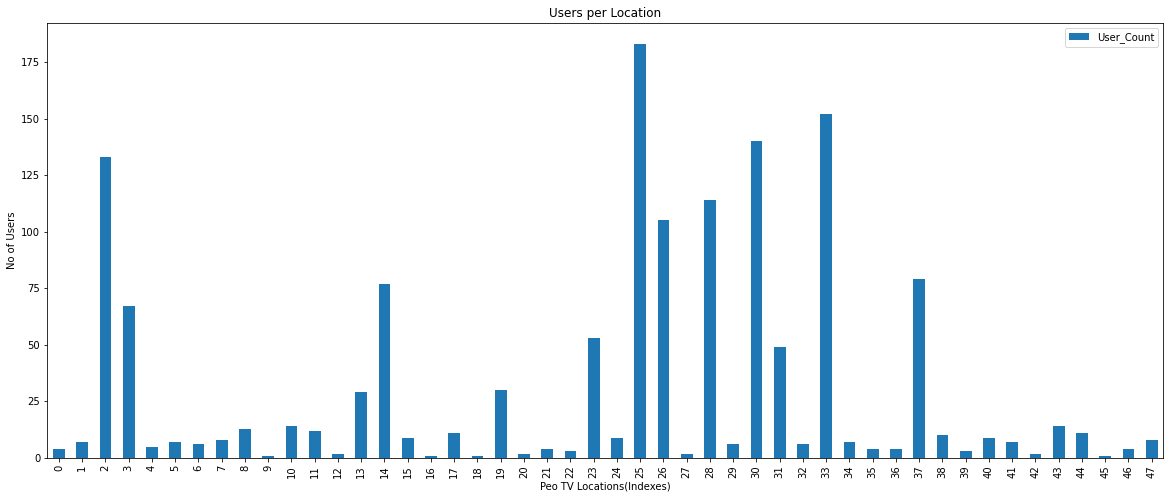

In [142]:
#tv_package_info.plot(x="User_Count", y="Peo_TV_Package")
tv_loc_plot = tv_location_info.plot(kind="bar",title='Users per Location',figsize=(20,8))
tv_loc_plot.set(xlabel='Peo TV Locations(Indexes)',ylabel='No of Users')

In [143]:
user_location = tv_usage_info[['Phone_Number.hash','Peo_TV_Package','Location_Identifier']]
user_location

,Phone_Number.hash,Peo_TV_Package,Location_Identifier
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,IM-NODEUA5000(IPMB)391531
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,IM-NODEUA5000(IPMB)391531
5,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,IM-NODEUA5000(IPMB)391531
6,a41d8c2af7a4d478417f2368ee852296,PEO_UTHAYAM,IM-NODEUA5000(IPMB)391531
8,09e7342066a13ca589d4a58ea0c685ae,PEO_SILVER,IM-NODEUA5000(IPMB)391531
...,...,...,...
2585,3ec6441eb5df6ef9ba2bdd63f919ce8b,PEO_SILVER,HK-OCC-NODEMSAG5200-ISL506561
2587,013736757d2ddad83cdfaa418921605c,PEO_SILVER,HK-OCC-NODEMSAG5200-ISL506561
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,WI-NWT-NODEMSAG5200-ISL485201
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,WI-NWT-NODEMSAG5200-ISL485201


In [144]:
user_location.to_csv("data/user_profile/PEO_TV_Locations_of_Users.csv")

# Phase 3

## Binnig by Peo TV Package 

- 1. group by location columns
- 2. Bin by location and get counts

In [145]:
tv_package_info = tv_usage_info[['Peo_TV_Package']]
tv_package_info["User_Count"] = 1
tv_package_info = tv_package_info.groupby(['Peo_TV_Package'], axis=0,as_index=False).sum()

tv_package_info

<ipython-input-145-83d68e485037>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_package_info["User_Count"] = 1


,Peo_TV_Package,User_Count
0,BOC,5
1,DOUBLEPROMO,2
2,LEISURE_SPORTS,1
3,LOTUS,2
4,NEW_SLT_STAFF_PACKAGE,9
5,NEW_YEAR_TREAT,6
6,PEO_ENTERTAINMENT,18
7,PEO_FAMILY,1
8,PEO_GOLD,6
9,PEO_PLATINUM,4


In [146]:
tv_package_info.to_csv("data/user_profile/PEO_TV_Package_User_Count.csv")

In [147]:
tv_package_info['Peo_TV_Package'] = tv_package_info['Peo_TV_Package'].astype('category')

[Text(0.5, 0, 'Peo TV Packages(Indexes)'), Text(0, 0.5, 'No of Users')]

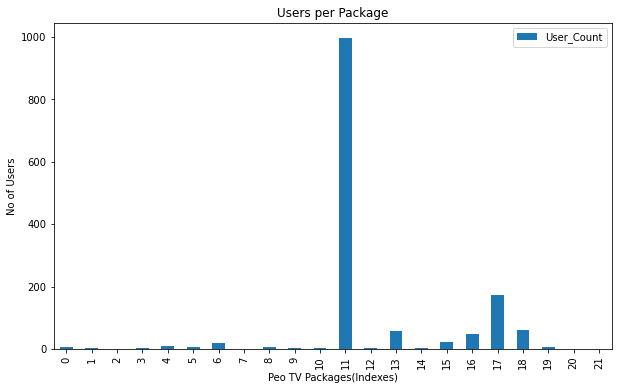

In [148]:
#tv_package_info.plot(x="User_Count", y="Peo_TV_Package")
bar_plot = tv_package_info.plot(kind="bar",title='Users per Package',figsize=(10,6))
bar_plot.set(xlabel='Peo TV Packages(Indexes)',ylabel='No of Users')

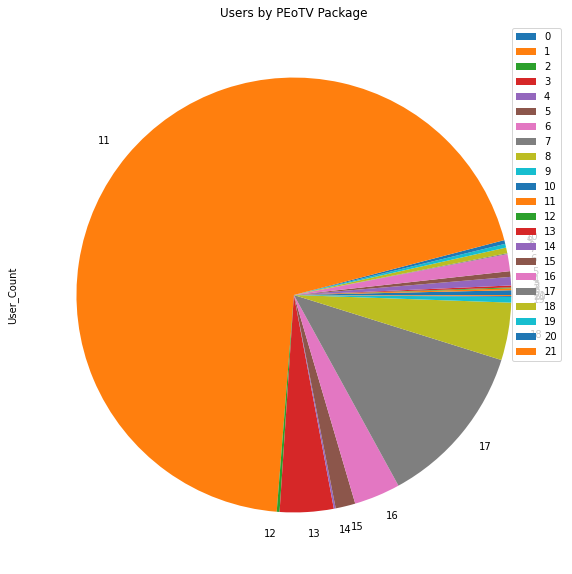

In [149]:
packages_plot = tv_package_info.plot(kind="pie",y="User_Count",title='Users by PEoTV Package',figsize=(20,10))